In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('teste2_dados_200000.txt') as f:
    lines = f.readlines()

In [3]:
dados_lst=[]
freqs_lst=[]
for idx,line in enumerate(lines):
    medida = line.split(" DADOS ")
    dados_linha = np.fromstring(medida[1], dtype=int, sep=' ')
    if dados_linha.size==600:
        dados_lst.append(dados_linha)
        freqs_linha = medida[0].replace("******** ","").split(" -> ")
        freqs_lst.append(np.fromstring(freqs_linha[1], dtype=float, sep=' '))
    else:
        print(medida[0].replace("******** ",""))
        print(dados_linha.shape)

freqs = np.array(freqs_lst)
dados = np.array(dados_lst)

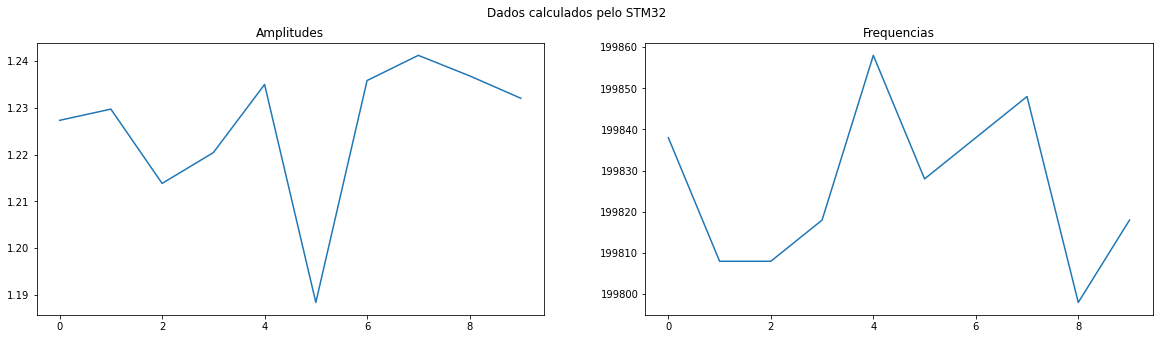

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(freqs[:,0])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs[:,1])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo STM32')
plt.show()


In [5]:
dados.shape

(10, 600)

In [6]:
linha = 1

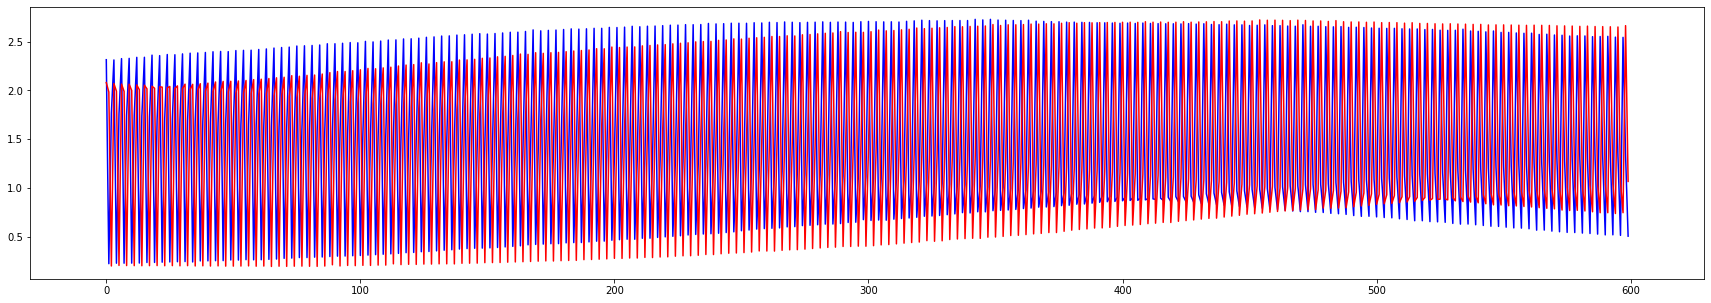

In [7]:
limite=600
k=3.3/4095
plt.figure(figsize=(30,5))
plt.plot(dados[linha,:limite]*k,'b-')
plt.plot(dados[8,:limite]*k,'r-')
plt.show()

In [8]:
# retorna apenas a componente da fft em uma única frequencia, fazendo a conta como se tivesse zeros a mais
def componente_precisa(sinal,frequencia,sample_freq, fator_zeros=100000):
    N = len(sinal)
    Ntotal = N*fator_zeros
    df = sample_freq/Ntotal
    k = np.round(frequencia/df)
    Freal = 0
    Fimag = 0
    for n in range(N):
        Freal += sinal[n]*np.cos(k*n*2*np.pi/Ntotal)
        Fimag += sinal[n]*np.sin(k*n*2*np.pi/Ntotal)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj/(N/2)

In [9]:
# somatorio da fft sem usar complexo, retorna amplitude
def somaa(f,k):
    Freal = 0
    Fimag = 0
    N = len(f)
    for n in range(N):
        Freal += f[n]*np.cos(k*n*2*np.pi/N)
        Fimag += f[n]*np.sin(k*n*2*np.pi/N)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj

In [10]:
# plota o meu gráfico da fft
def print_fft(sinal,sample_freq, completo = False):
    N = len(sinal)
    df = sample_freq/N
    print(f'df = {df}')
    ffty = np.zeros(N)
    for k in range(N):
        ffty[k] = somaa(sinal,k)
    xf = np.array(range(N))*df
    yf = ffty*2/N
    plt.figure(figsize=(30,5))
    if completo:
        plt.plot(xf,yf,'bx-')
    else:
        plt.plot(xf[0:int((N+1)/2)],yf[0:int((N+1)/2)],'bx-')
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()
    return ffty, df

df = 2000.0


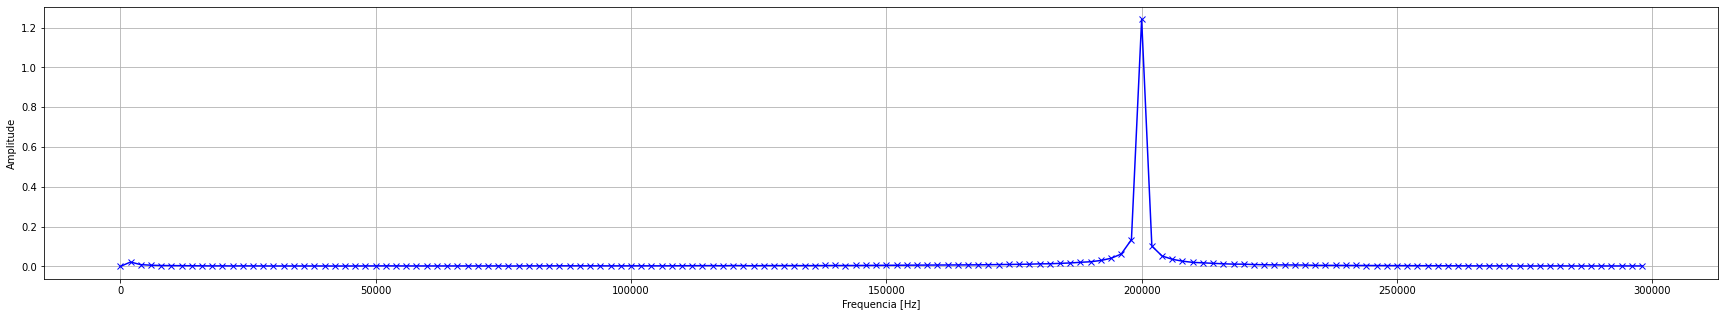

In [11]:
npontos = 300
ffty, df = print_fft((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,600000)

df = 1000.0


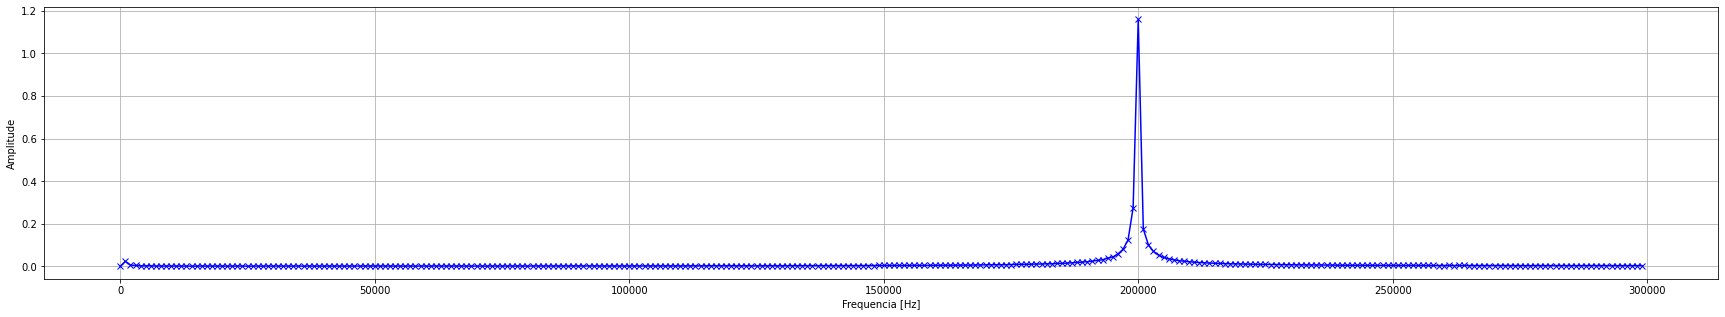

In [12]:
npontos = 600
ffty, df = print_fft((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,600000)

In [13]:
frequencia = 200000
sample_freq = 600000
npontos_range = range(60,600,60)
componentes = [componente_precisa((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,
                                  frequencia,sample_freq, fator_zeros=100000) for npontos in npontos_range]

Text(0, 0.5, 'Componente em f=200000Hz')

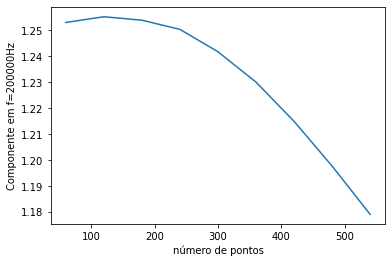

In [14]:
plt.plot(npontos_range,componentes)
plt.xlabel('número de pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

In [15]:
frequencia = 200000
sample_freq = 600000
npontos = 60
inicio_range = range(0,600-npontos-1,10)
componentes = [componente_precisa((dados[linha,inicio:inicio+npontos]-np.mean(dados[linha,inicio:inicio+npontos]))*k,frequencia,sample_freq, fator_zeros=100000) for inicio in inicio_range]

Text(0, 0.5, 'Componente em f=200000Hz')

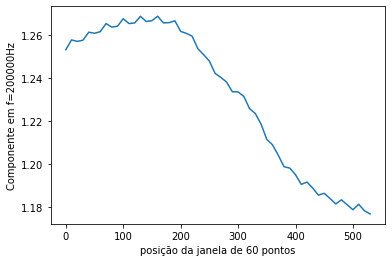

In [16]:
plt.plot(inicio_range,componentes)
plt.xlabel(f'posição da janela de {npontos} pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

In [17]:
frequencia_range = range(170000,210000,10)
sample_freq = 600000
inicio_pontos = 0
npontos = 300
componentes = [componente_precisa((dados[linha,inicio_pontos:inicio_pontos+npontos]-
                                   np.mean(dados[linha,inicio_pontos:inicio_pontos+npontos]))*k,
                                  frequencia_i,sample_freq, fator_zeros=100000) 
               for frequencia_i in frequencia_range]

In [18]:
frequencia_range2 = range(170000,210000,10)
sample_freq = 600000
npontos2 = 600
componentes2 = [componente_precisa((dados[linha,:npontos2]-np.mean(dados[linha,:npontos2]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range2]

In [19]:
frequencia_range3 = range(170000,210000,10)
sample_freq = 600000
npontos3 = 30
componentes3 = [componente_precisa((dados[linha,:npontos3]-np.mean(dados[linha,:npontos3]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range3]

In [20]:
frequencia_range4 = range(170000,210000,10)
sample_freq = 600000
npontos4 = 60
componentes4 = [componente_precisa((dados[linha,:npontos4]-np.mean(dados[linha,:npontos4]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range4]

In [21]:
frequencia_range5 = range(170000,210000,10)
sample_freq = 600000
npontos5 = 3
componentes5 = [componente_precisa((dados[linha,:npontos5]-np.mean(dados[linha,:npontos5]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range5]

In [22]:
frequencia_range6 = range(170000,210000,10)
sample_freq = 600000
npontos6 = 6
componentes6 = [componente_precisa((dados[linha,:npontos6]-np.mean(dados[linha,:npontos6]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range6]

In [23]:
idx_pico = np.argmax(componentes)
print(idx_pico)

2981


In [24]:
# olhando 300 pontos
for pontos in range(0,10,1):
    erro_perc = ((componentes[idx_pico]-componentes[idx_pico-pontos])/componentes[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 1Hz	Erro: 0.00788890926377318%
dif freq: 2Hz	Erro: 0.023942202300044582%
dif freq: 3Hz	Erro: 0.048157223810896606%
dif freq: 4Hz	Erro: 0.08053011601717278%
dif freq: 5Hz	Erro: 0.12105581937713551%
dif freq: 6Hz	Erro: 0.16972807351917496%
dif freq: 7Hz	Erro: 0.22653941838176295%
dif freq: 8Hz	Erro: 0.29148119556740504%
dif freq: 9Hz	Erro: 0.36454354990420795%


In [25]:
# olhando 600 pontos
idx_pico = np.argmax(componentes2)
for pontos in range(0,10,1):
    erro_perc = ((componentes2[idx_pico]-componentes2[idx_pico-pontos])/componentes2[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 1Hz	Erro: 0.016084403950393022%
dif freq: 2Hz	Erro: 0.06483220678193007%
dif freq: 3Hz	Erro: 0.14621788565947402%
dif freq: 4Hz	Erro: 0.260196613330432%
dif freq: 5Hz	Erro: 0.40670428891021615%
dif freq: 6Hz	Erro: 0.5856575822194361%
dif freq: 7Hz	Erro: 0.7969539916417908%
dif freq: 8Hz	Erro: 1.040471915455855%
dif freq: 9Hz	Erro: 1.3160707365886075%


In [26]:
# olhando 30 pontos
idx_pico = np.argmax(componentes3)
for pontos in range(0,60,6):
    erro_perc = ((componentes3[idx_pico]-componentes3[idx_pico-pontos])/componentes3[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 6Hz	Erro: 0.001670348416377198%
dif freq: 12Hz	Erro: 0.006284751047139147%
dif freq: 18Hz	Erro: 0.01384184730812607%
dif freq: 24Hz	Erro: 0.024340121896990266%
dif freq: 30Hz	Erro: 0.03777790495678727%
dif freq: 36Hz	Erro: 0.05415337224747616%
dif freq: 42Hz	Erro: 0.0734645453303121%
dif freq: 48Hz	Erro: 0.09570929175835691%
dif freq: 54Hz	Erro: 0.12088532527858725%


In [27]:
# olhando 60 pontos
idx_pico = np.argmax(componentes4)
for pontos in range(0,30,3):
    erro_perc = ((componentes4[idx_pico]-componentes4[idx_pico-pontos])/componentes4[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 3Hz	Erro: 0.0017964772648324954%
dif freq: 6Hz	Erro: 0.006539572668885885%
dif freq: 9Hz	Erro: 0.014228520200694802%
dif freq: 12Hz	Erro: 0.02486239786368846%
dif freq: 15Hz	Erro: 0.038440127765093465%
dif freq: 18Hz	Erro: 0.054960476217949666%
dif freq: 21Hz	Erro: 0.07442205385154316%
dif freq: 24Hz	Erro: 0.09682331573155001%
dif freq: 27Hz	Erro: 0.12216256148951858%


In [28]:
# olhando 3 pontos
idx_pico = np.argmax(componentes5)
for pontos in range(0,30,3):
    erro_perc = ((componentes5[idx_pico]-componentes5[idx_pico-pontos])/componentes5[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 3Hz	Erro: 0.014061224935002834%
dif freq: 6Hz	Erro: 0.02812569493540826%
dif freq: 9Hz	Erro: 0.04219340865515609%
dif freq: 12Hz	Erro: 0.05626436474798352%
dif freq: 15Hz	Erro: 0.0703385618672901%
dif freq: 18Hz	Erro: 0.08441599866613769%
dif freq: 21Hz	Erro: 0.09849667379735186%
dif freq: 24Hz	Erro: 0.11258058591345414%
dif freq: 27Hz	Erro: 0.12666773366669612%


In [29]:
# olhando 6 pontos
idx_pico = np.argmax(componentes6)
for pontos in range(0,50,5):
    erro_perc = ((componentes6[idx_pico]-componentes6[idx_pico-pontos])/componentes6[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 5Hz	Erro: 0.01081093401657493%
dif freq: 10Hz	Erro: 0.021698201919910235%
dif freq: 15Hz	Erro: 0.03266176545797673%
dif freq: 20Hz	Erro: 0.04370158629539278%
dif freq: 25Hz	Erro: 0.05481762601330433%
dif freq: 30Hz	Erro: 0.06600984610957346%
dif freq: 35Hz	Erro: 0.07727820799898412%
dif freq: 40Hz	Erro: 0.08862267301303639%
dif freq: 45Hz	Erro: 0.10004320240028937%


In [30]:
for idx,(c,f) in enumerate(zip(componentes,frequencia_range)):
    print(f'{idx}\t{c}\t{f}')

0	0.008696469172167348	170000
1	0.009058350427931048	170010
2	0.009419053570021778	170020
3	0.009778402696276669	170030
4	0.010136234515671756	170040
5	0.01049239624221635	170050
6	0.010846743916330627	170060
7	0.011199141057609002	170070
8	0.011549457576558474	170080
9	0.01189756889024661	170090
10	0.012243355199793847	170100
11	0.012586700897075524	170110
12	0.012927494075356594	170120
13	0.013265626123977223	170130
14	0.013600991391489084	170140
15	0.013933486904714411	170150
16	0.014263012133875643	170160
17	0.014589468795764803	170170
18	0.014912760688490755	170180
19	0.015232793552614986	170190
20	0.015549474954327467	170200
21	0.015862714187166647	170210
22	0.016172422189427712	170220
23	0.01647851147480477	170230
24	0.01678089607428394	170240
25	0.017079491487671454	170250
26	0.017374214643270536	170260
27	0.01766498386458528	170270
28	0.01795171884309632	170280
29	0.018234340616152832	170290
30	0.018512771549391606	170300
31	0.018786935322966387	170310
32	0.019056756921144197	

1169	0.007564131344618781	181690
1170	0.006935683585924798	181700
1171	0.006310329618645483	181710
1172	0.005690025515403147	181720
1173	0.00507759252666789	181730
1174	0.004477271739839475	181740
1175	0.0038957223805676255	181750
1176	0.0033438598828937263	181760
1177	0.0028402007392576306	181770
1178	0.00241627133680234	181780
1179	0.002121582692875152	181790
1180	0.0020146830940573545	181800
1181	0.002124846420874658	181810
1182	0.0024230997809586313	181820
1183	0.0028512482881329865	181830
1184	0.0033600672159033854	181840
1185	0.003918201117803957	181850
1186	0.0045072229939544265	181860
1187	0.005116262351716678	181870
1188	0.005738681872548296	181880
1189	0.006370250201022554	181890
1190	0.007008149018996038	181900
1191	0.007650421110391542	181910
1192	0.00829565315876787	181920
1193	0.008942786914863844	181930
1194	0.009591002923651636	181940
1195	0.010239646664235531	181950
1196	0.010888180286222045	181960
1197	0.011536150257978982	181970
1198	0.012183165178170877	181980
1199	

1708	0.05467180755814346	187080
1709	0.05429944193430465	187090
1710	0.05391302410315217	187100
1711	0.05351262579366572	187110
1712	0.05309832227050468	187120
1713	0.05267019232178369	187130
1714	0.052228318246003984	187140
1715	0.051772785838278365	187150
1716	0.05130368437565955	187160
1717	0.05082110660173183	187170
1718	0.050325148710394466	187180
1719	0.049815910328895534	187190
1720	0.04929349450008305	187200
1721	0.048758007663936266	187210
1722	0.04820955963835276	187220
1723	0.04764826359924069	187230
1724	0.047074236059899806	187240
1725	0.046487596849746265	187250
1726	0.045888469092411927	187260
1727	0.04527697918319704	187270
1728	0.04465325676597494	187280
1729	0.04401743470952618	187290
1730	0.043369649083426526	187300
1731	0.0427100391334093	187310
1732	0.042038747256408875	187320
1733	0.0413559189752574	187330
1734	0.040661702913127915	187340
1735	0.03995625076783094	187350
1736	0.03923971728609058	187360
1737	0.03851226023785637	187370
1738	0.03777404039089422	187380

1990	0.011348920702701088	189900
1991	0.01257639121181834	189910
1992	0.013803661264035044	189920
1993	0.015030305665363397	189930
1994	0.016255936097028665	189940
1995	0.017480188142374786	189950
1996	0.018702713435844842	189960
1997	0.019923174732851826	189970
1998	0.021141242717591605	189980
1999	0.022356593883219637	189990
2000	0.023568909095039038	190000
2001	0.024777872600778794	190010
2002	0.025983171340910563	190020
2003	0.027184494464626324	190030
2004	0.028381532989633154	190040
2005	0.02957397956428006	190050
2006	0.03076152830359965	190060
2007	0.03194387467963661	190070
2008	0.033120715452037895	190080
2009	0.03429174862893444	190090
2010	0.03545667345087246	190100
2011	0.036615190392393596	190110
2012	0.03776700117731797	190120
2013	0.03891180880468738	190130
2014	0.04004931758316286	190140
2015	0.04117923317198869	190150
2016	0.04230126262731159	190160
2017	0.04341511445270191	190170
2018	0.04452049865302325	190180
2019	0.04561712679107234	190190
2020	0.04670471204636723

2328	0.08727453338997726	193280
2329	0.08612332286423924	193290
2330	0.08494718450664795	193300
2331	0.08374632545662106	193310
2332	0.08252095935824788	193320
2333	0.08127130632986965	193330
2334	0.07999759293208401	193340
2335	0.07870005213422684	193350
2336	0.07737892327930951	193360
2337	0.07603445204745217	193370
2338	0.0746668904177775	193380
2339	0.07327649662882345	193390
2340	0.07186353513742645	193400
2341	0.07042827657614784	193410
2342	0.06897099770922521	193420
2343	0.06749198138705938	193430
2344	0.06599151649926678	193440
2345	0.06446989792632826	193450
2346	0.06292742648983132	193460
2347	0.06136440890136915	193470
2348	0.05978115771011095	193480
2349	0.05817799124907169	193490
2350	0.05655523358018839	193500
2351	0.05491321443820734	193510
2352	0.05325226917349632	193520
2353	0.05157273869388375	193530
2354	0.049874969405647895	193540
2355	0.04815931315382215	193550
2356	0.04642612716206351	193560
2357	0.044675773972356204	193570
2358	0.04290862138495198	193580
2359	0.

3357	0.08317657049750267	203570
3358	0.07986995269579014	203580
3359	0.076562035587757	203590
3360	0.07325368234978576	203600
3361	0.06994576838824958	203610
3362	0.06663918503939176	203620
3363	0.06333484444328276	203630
3364	0.06003368603095287	203640
3365	0.05673668526251328	203650
3366	0.053444865558131424	203660
3367	0.050159314841969414	203670
3368	0.04688120888715506	203680
3369	0.043611844917206155	203690
3370	0.040352691072255226	203700
3371	0.037105461127811726	203710
3372	0.033872230739212084	203720
3373	0.03065562456824346	203730
3374	0.027459129736199687	203740
3375	0.02428764603752569	203750
3376	0.02114850696036286	203760
3377	0.018053504943514646	203770
3378	0.015023244025144104	203780
3379	0.01209742812889457	203790
3380	0.009361837953634287	203800
3381	0.007023923419589934	203810
3382	0.005581683722543738	203820
3383	0.00572891608952669	203830
3384	0.007350754309461592	203840
3385	0.009720185300860192	203850
3386	0.012403180002432165	203860
3387	0.015223779540859971	2

3744	0.060738864575427556	207440
3745	0.059287719580283504	207450
3746	0.05782586702965246	207460
3747	0.05635369321601973	207470
3748	0.05487158648816235	207480
3749	0.05337993723821923	207490
3750	0.05187913790346612	207500
3751	0.05036958298587723	207510
3752	0.048851669093886385	207520
3753	0.04732579501127138	207530
3754	0.04579236179987621	207540
3755	0.044251772944797124	207550
3756	0.04270443455290558	207560
3757	0.04115075561927937	207570
3758	0.03959114838056987	207580
3759	0.03802602878076761	207590
3760	0.036455817083673896	207600
3761	0.03488093867891747	207610
3762	0.03330182514614656	207620
3763	0.03171891566806392	207630
3764	0.030132658921010323	207640
3765	0.028543515629251275	207650
3766	0.026951962056694145	207660
3767	0.025358494846353875	207670
3768	0.023763637837108557	207680
3769	0.02216795184549161	207690
3770	0.020572049006678843	207700
3771	0.018976614325424607	207710
3772	0.017382439000929648	207720
3773	0.01579047370053917	207730
3774	0.014201917111456078	2

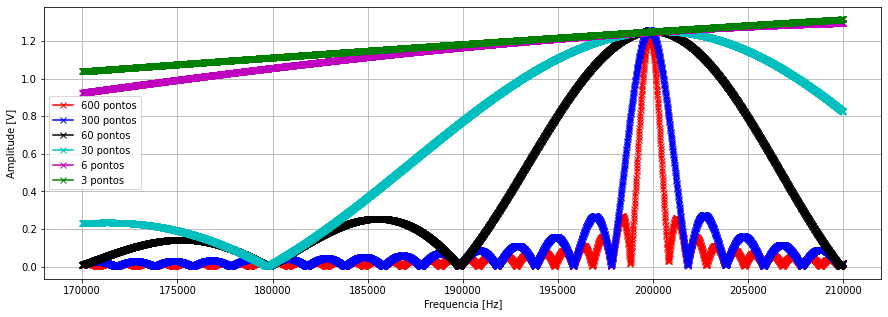

In [31]:
idx_pico = np.argmax(componentes)
idx_pico2 = np.argmax(componentes2)
idx_pico3 = np.argmax(componentes3)
idx_pico4 = np.argmax(componentes4)
idx_pico5 = np.argmax(componentes5)
idx_pico6 = np.argmax(componentes6)



plt.figure(figsize=(15,5))
plt.plot(frequencia_range2,componentes2,'rx-',label=f'{npontos2} pontos')
plt.plot(frequencia_range,componentes,'bx-',label=f'{npontos} pontos')
plt.plot(frequencia_range4,componentes4,'kx-',label=f'{npontos4} pontos')
plt.plot(frequencia_range3,componentes3,'cx-',label=f'{npontos3} pontos')
plt.plot(frequencia_range6,componentes6,'mx-',label=f'{npontos6} pontos')
plt.plot(frequencia_range5,componentes5,'gx-',label=f'{npontos5} pontos')



plt.ylabel(f'Amplitude [V]')
plt.xlabel(f'Frequencia [Hz]')
plt.legend()
plt.grid()

In [32]:
dados.shape[0]

10

In [33]:
frequencia = 199810
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 300
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-1000,frequencia+1000,10)
    sample_freq = 600000
    componentes2 = [componente_precisa((dados[frame,:npontos2]-np.mean(dados[frame,:npontos2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.2617264672138793	199850	1.2617250547081522	1.2617264672138793	1.2616242122470613
1	1.2593359581296397	199810	1.2592366102585768	1.2593359581296397	1.2593324706906641
2	1.1860570736213571	199780	1.1859983790881192	1.1860570736213571	1.1860173063676687
3	1.2559960274903188	199830	1.2559155412980163	1.2559960274903188	1.2559740374039698
4	1.2633702227555885	199870	1.2632932877429963	1.2633702227555885	1.2633436991184388
5	1.1780722049886416	199820	1.1780358281926668	1.1780722049886416	1.1780118236007031
6	1.2655941294596424	199830	1.2654988938849845	1.2655941294596424	1.265585199387728
7	1.261805642268965	199840	1.2617195523558296	1.261805642268965	1.2617883744288687
8	1.2472775613694649	199800	1.2472682900235001	1.2472775613694649	1.24718450968232
9	1.2027018149753723	199810	1.2026701647635525	1.2027018149753723	1.202634290117839


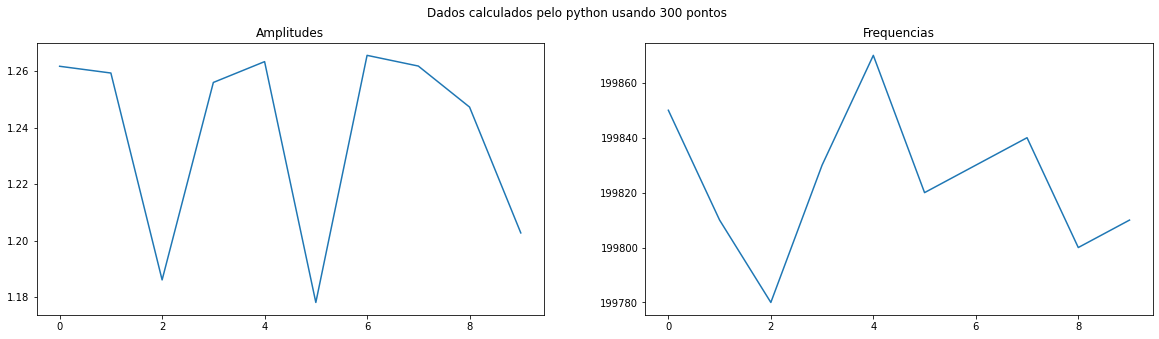

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python usando 300 pontos')
plt.show()

In [35]:
frequencia = 199810
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-1000,frequencia+1000,10)
    sample_freq = 600000
    componentes2 = [componente_precisa((dados[frame,:npontos2]-np.mean(dados[frame,:npontos2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.2276501133689204	199840	1.2275341142947471	1.2276501133689204	1.2273626252362073
1	1.2300682989720564	199810	1.229870449817984	1.2300682989720564	1.2298642897320708
2	1.2141585799944188	199810	1.2140155366568421	1.2141585799944188	1.213900053255568
3	1.220733798398262	199820	1.220672953597651	1.220733798398262	1.2203949957069167
4	1.2353197775218505	199860	1.2352140783066325	1.2353197775218505	1.2350235107209262
5	1.1886658292147394	199830	1.1886482215155196	1.1886658292147394	1.188289670187211
6	1.2361811855815477	199840	1.2359847501048624	1.2361811855815477	1.235972929313215
7	1.2415663492014433	199840	1.241207925569563	1.2415663492014433	1.2415220145937058
8	1.2371890184297907	199800	1.236992451765375	1.2371890184297907	1.2369863203422287
9	1.2323716849890003	199820	1.2322584103938738	1.2323716849890003	1.2320805295324062


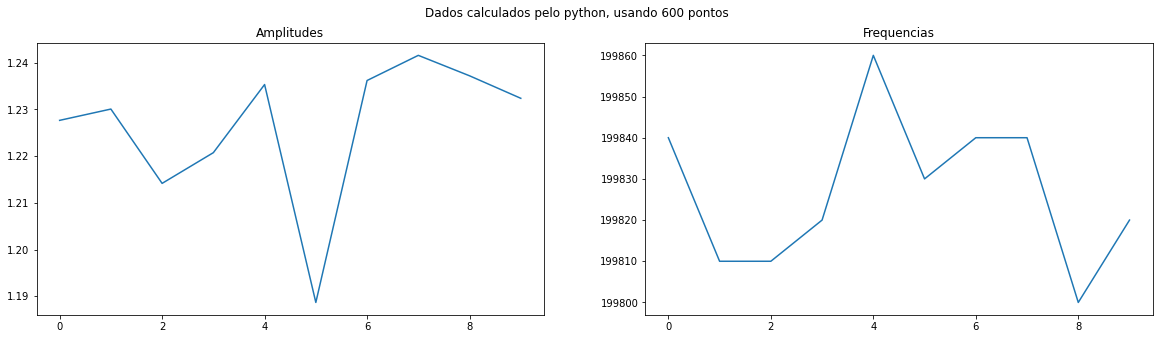

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python, usando 600 pontos')
plt.show()

### Para essa freq downsampling não faz sentido porque já estamos lidando com apenas 3 pontos por senoide.